In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

<AxesSubplot:>

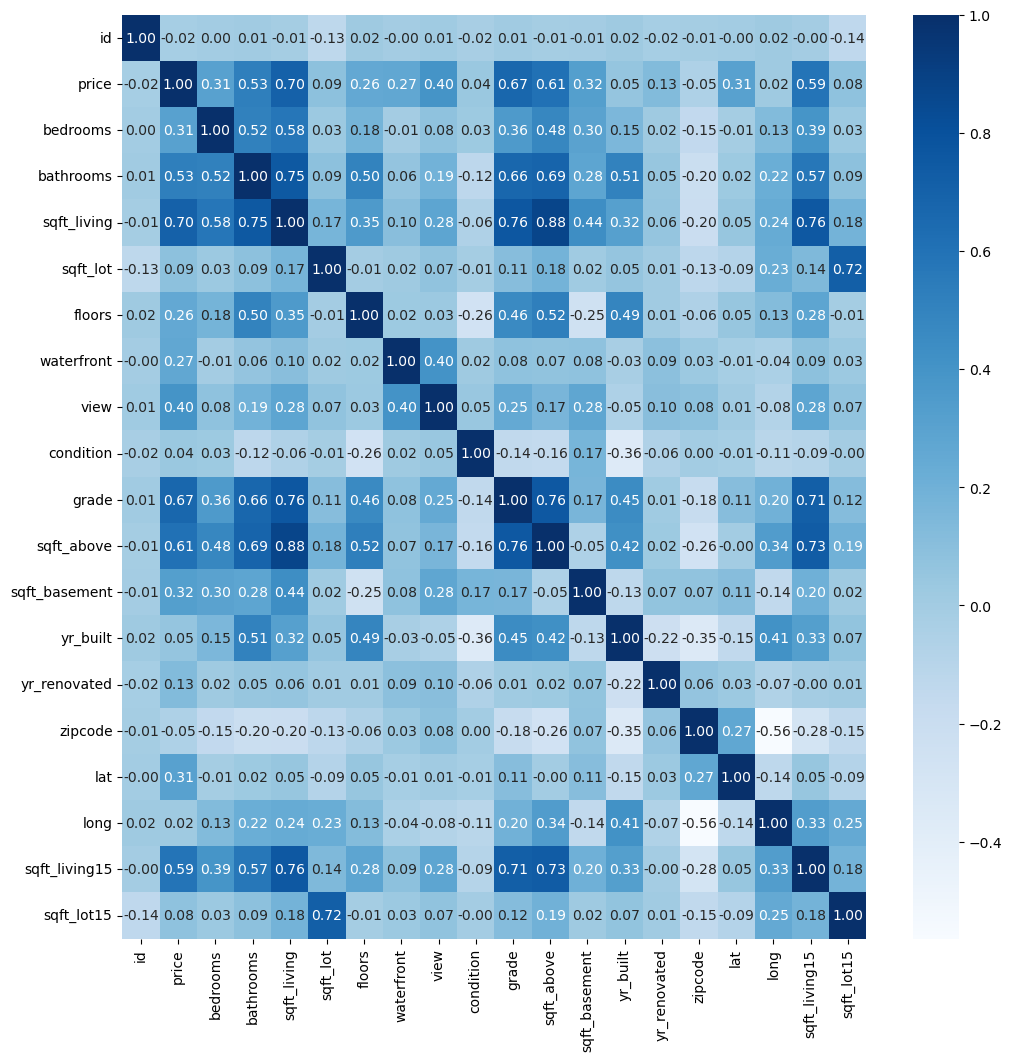

In [2]:
dataset = pd.read_csv('house_prices.csv')
correlation_data=dataset.drop("date",axis=1)
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues')

In [3]:
threshold=0.2
data = pd.read_csv('house_prices.csv')
data=data.drop('date',axis=1)
correlation_matrix = dataset.corr()

columns=correlation_matrix.columns
drop_columns=[]
num=len(correlation_matrix['price'])
for i in range(num):
    if abs(correlation_matrix["price"][i])<threshold:
        drop_columns.append(columns[i])

In [4]:
data=data.copy()
for column in drop_columns:
    data=data.drop(column,axis=1)
data

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,47.5345,1410


In [5]:
new_df=data.copy()
for column in new_df.columns:
    if len(new_df[column].unique())>3:
        Q1 = new_df[column].quantile(0.25)
        Q3 = new_df[column].quantile(0.75)
        IQR = Q3 - Q1

    # Define bounds for the outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

    # Filter the data
        new_df = new_df[(new_df[column] >= lower_bound) & (new_df[column] <= upper_bound)]
new_df

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,47.5345,1410


In [6]:
X = new_df.drop("price", axis=1)
y = new_df['price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
maximum=max(y)
y=y/maximum

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=8)
# Define the kernel for Gaussian process regression
kernel = C(1.0, (1e-2, 1e2)) * RBF(2, (1e-2, 1e2))
# Initialize Gaussian process regression model
model = GaussianProcessRegressor(kernel=kernel, alpha=0.15, normalize_y=True)

In [8]:
training_mse = []
training_r2=[]
testing_mse=[]
testing_r2=[]
#Fit the model to the data
model.fit(X_train,y_train)
#Predict the house prices for new data
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
test_mse = mean_squared_error(y_test,predictions_test)
testing_mse.append(test_mse)
r2_test = r2_score(y_test, predictions_test)
testing_r2.append(r2_test)
mse_train = mean_squared_error(y_train, predictions_train)
training_mse.append(mse_train)
r2_train = r2_score(y_train, predictions_train)
training_r2.append(r2_train)    

In [34]:
print("Training size: ", X_train.shape[0])
print("Training R2 score: ", training_r2[-1])
print("Training MSE: ", training_mse[-1])
print("Testing size: ", X_test.shape[0])
print("Testing MSE: ",testing_mse[-1])
print("Testing R2 score: ", testing_r2[-1])

Training size:  13165
Training R2 score:  0.8501226803087722
Training MSE:  0.0037299816133367796
Testing size:  3292
Testing MSE:  0.006905180610359016
Testing R2 score:  0.7186973639680014


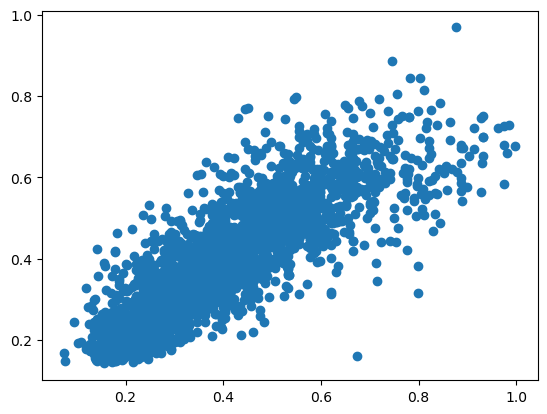

In [13]:
plt.scatter(y_test,predictions_test)

Text(0.5, 1.0, 'Line plot of Actual and Predicted')

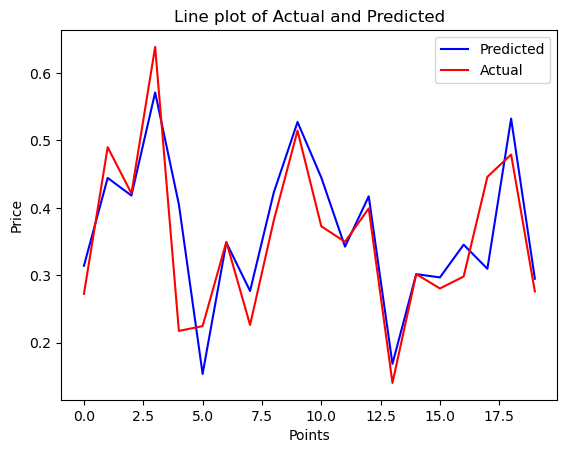

In [36]:
import random
num=20
x_num=[i for i in range(num)]
random_points=[]
y_predicted=np.array(predictions_test)
array_length=len(y_predicted)
array_length=[i for i in range(array_length)]
y_actual=np.array(y_test)
while 1:
    element=random.choice(array_length)
    if element not in random_points:
        random_points.append(element)
        if len(random_points)==num:
            break
y_pred_plot=[]
y_actual_plot=[]
for i in random_points:
    y_actual_plot.append(y_actual[i])
    y_pred_plot.append(y_predicted[i])
    
plt.plot(x_num,y_pred_plot,label="Predicted",color="b")
plt.plot(x_num,y_actual_plot,label="Actual",color="r")
plt.legend()
plt.xlabel("Points")
plt.ylabel("Price")
plt.title("Line plot of Actual and Predicted")

Text(0.5, 1.0, 'Scatter plot of Actual vs Predicted')

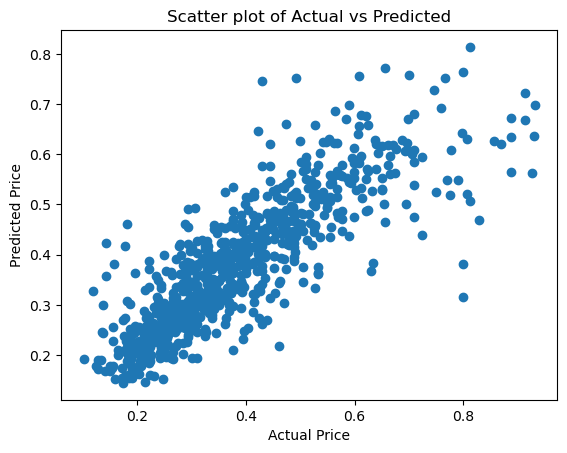

In [33]:
import random
num=800
x_num=[i for i in range(num)]
random_points=[]
y_predicted=np.array(predictions_test)
array_length=len(y_predicted)
array_length=[i for i in range(array_length)]
y_actual=np.array(y_test)
while 1:
    element=random.choice(array_length)
    if element not in random_points:
        random_points.append(element)
        if len(random_points)==num:
            break
y_pred_plot=[]
y_actual_plot=[]
for i in random_points:
    y_actual_plot.append(y_actual[i])
    y_pred_plot.append(y_predicted[i])
    
plt.scatter(y_actual_plot,y_pred_plot)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Scatter plot of Actual vs Predicted")

In [37]:
dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
